# Importing necessary packages

In [1]:
import pandas as pd
import math
from queue import PriorityQueue
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab

### djikstra alorithm to find the minimum cost between two airports

In [3]:
def djikstra(src, dest, graph):
    num_v = len(graph)
    dists = {v:math.inf for v in range(num_v)}
    dists[src] = 0
    pq = PriorityQueue()
    pq.put((0, src,[]))
    visited = []
    final_path= []
    while not pq.empty():
        (_, current_vertex, path) = pq.get()
        visited.append(current_vertex)
        if current_vertex == dest:
            final_path = path
            break
        for neighbor in range(num_v):
            if graph[current_vertex][neighbor] != np.nan:
                distance = graph[current_vertex][neighbor]
                if neighbor not in visited:
                    old_cost = dists[neighbor]
                    new_cost = dists[current_vertex] + distance
                    if new_cost < old_cost:
                        pq.put((new_cost, neighbor, path+[(current_vertex, neighbor, {'weight':distance})]))
                        dists[neighbor] = new_cost
    return final_path, dists[dest]

### kruskal algorithm to construct minimum tree connecting all vertices

In [7]:
def find(i, parent):
    while parent[i] != i:
        i = parent[i]
    return i
def kruskal(graph):
    mincost = 0
    V = len(graph)
    parent = [i for i in range(len(graph))]
 
    # Include minimum weight edges one by one
    edge_count = 0
    edges = []
    while edge_count < V - 1:
        min_w = math.inf
        a = -1
        b = -1
        for i in range(V):
            for j in range(V):
                if find(i,parent) != find(j,parent) and graph[i][j] < min_w:
                    min_w = graph[i][j]
                    a = i
                    b = j
        a = find(a, parent)
        b = find(b, parent)
        parent[a] = b
        edges.append((a, b, {'weight':min_w}))
        edge_count += 1
        mincost += min_w
    return edges, mincost

### reading the dataset and filtering the necessary columns and constructing the graph using kruskal's algorithm

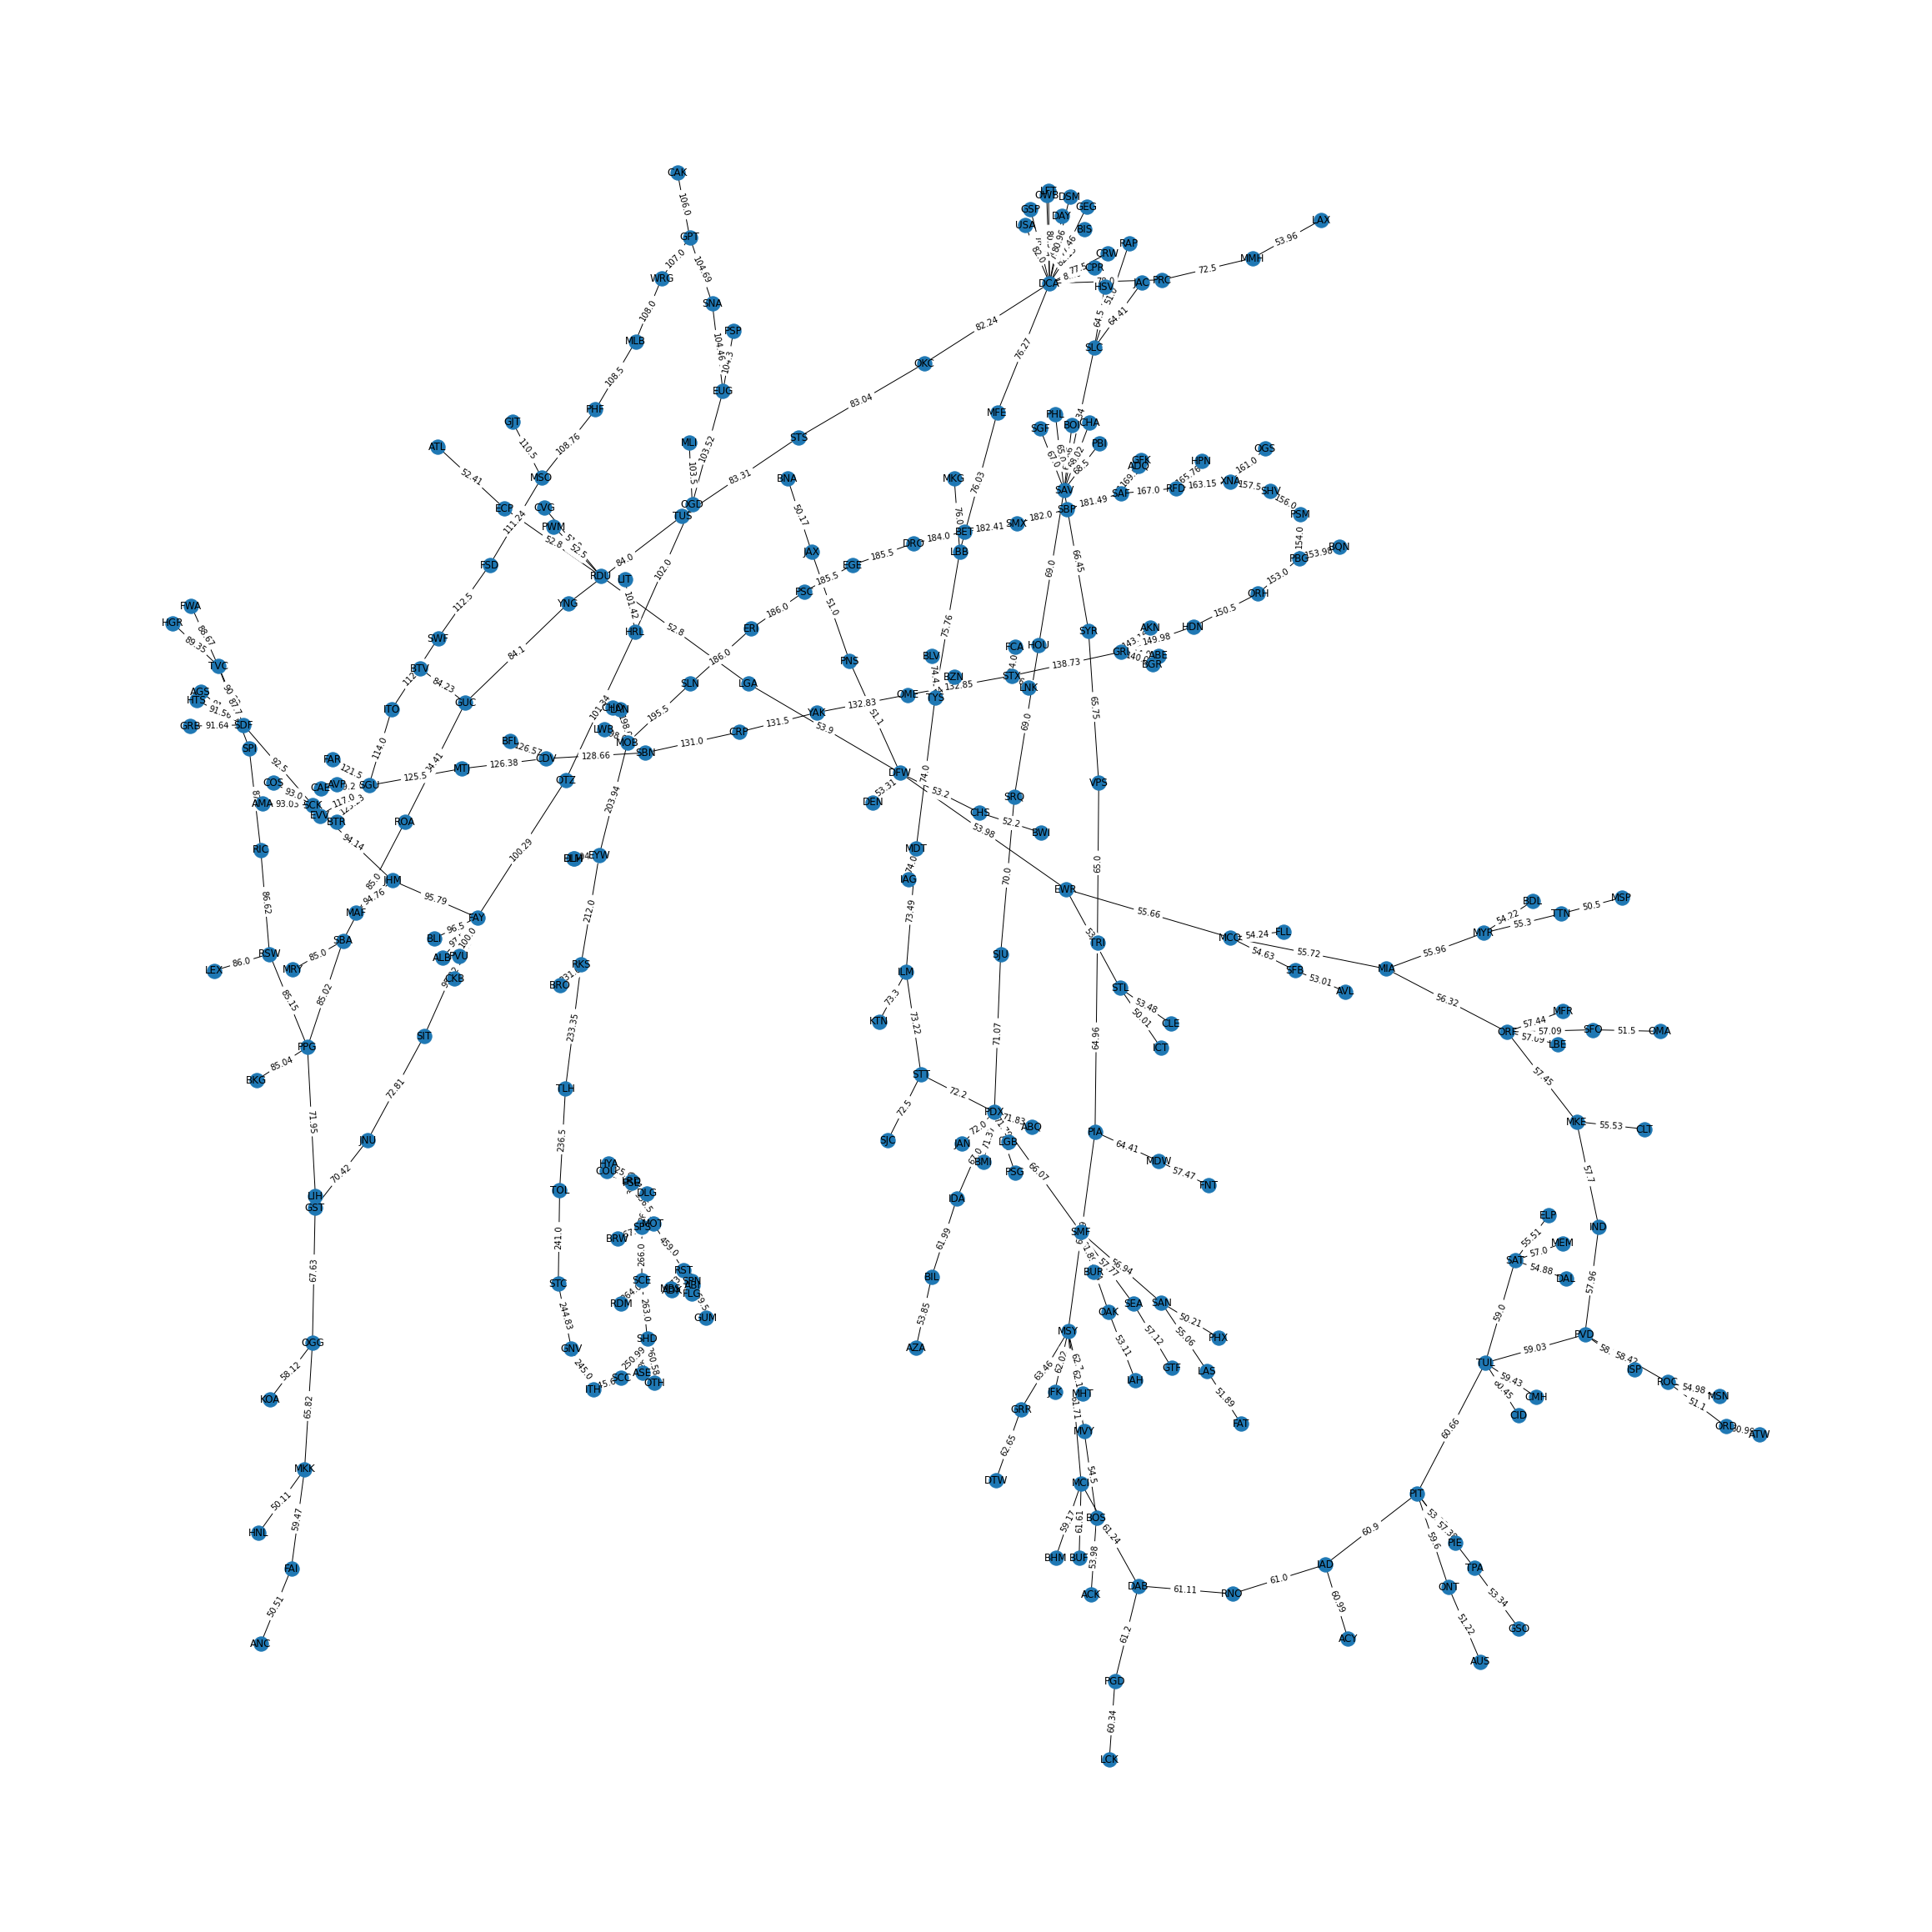

In [13]:
data=pd.read_csv("Cleaned_2018_Flights.csv")
df=data[['Origin','Dest','Miles','PricePerTicket']].drop_duplicates()
cities=sorted(list(set(list(data['Origin'].values)+list(data['Dest'].values))))
price_graph = [[math.inf for m in range(len(cities))] for n in range(len(cities))]
for row in df.itertuples():
    src_idx = cities.index(row[1])
    dst_idx = cities.index(row[2])
    price_graph[src_idx][dst_idx] = row[4]
    price_graph[dst_idx][src_idx] = row[4]
path,dist = kruskal(price_graph)
G = nx.Graph()
G.add_nodes_from(list(set(list(map(lambda x:x[0],path))+list(map(lambda x:x[1],path)))))
G.add_edges_from(path)
pos = nx.spring_layout(G)
nx.draw(G, pos, labels={k:v for k,v in enumerate(cities) if (k in set(map(lambda x:x[0], path))) or (k in set(map(lambda x:x[1], path)))}, with_labels=True)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels)
figure = plt.gcf() 
figure.set_size_inches(32, 32)
plt.show()

### finding the minimum cost between Origin and Destination airports using djikstra algorithm given by user

Enter OriginTLH
Enter DestinationTOL
[(255, 13, {'weight': 223.0}), (13, 98, {'weight': 153.0}), (98, 230, {'weight': 426.0}), (230, 256, {'weight': 895.0})] 1697.0


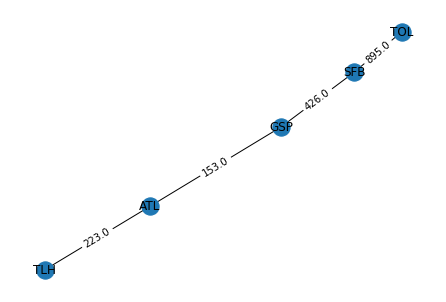

In [17]:
miles_graph = [[np.nan for m in range(len(cities))] for n in range(len(cities))]
for row in df.itertuples():
    src_idx = cities.index(row[1])
    dst_idx = cities.index(row[2])
    miles_graph[src_idx][dst_idx] = row[3]
    miles_graph[dst_idx][src_idx] = row[3]
src = input("Enter Origin ")
dst = input("Enter Destination ")
path,dist = djikstra(cities.index(src), cities.index(dst), miles_graph)
G = nx.Graph()
G.add_nodes_from(list(set(list(map(lambda x:x[0],path))+list(map(lambda x:x[1],path)))))
G.add_edges_from(path)
pos = nx.spring_layout(G)
print(path,dist)
nx.draw(G, pos, labels={k:v for k,v in enumerate(cities) if (k in set(map(lambda x:x[0], path))) or (k in set(map(lambda x:x[1], path)))}, with_labels=True)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()